In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

## **interventions**

# read data

In [ ]:
## read file
#file_path = '/content/drive/My Drive/KU_Leuven/datathon2024/data/interventions1.parquet'
#df_int1 = pd.read_parquet(file_path)

#file_path = '/content/drive/My Drive/KU_Leuven/datathon2024/data/interventions2.parquet'
#df_int2 = pd.read_parquet(file_path)

#file_path = '/content/drive/My Drive/KU_Leuven/datathon2024/data/interventions3.parquet'
#df_int3 = pd.read_parquet(file_path)

#file_path = '/content/drive/My Drive/KU_Leuven/datathon2024/data/interventions_bxl.parquet.gzip'
#df_int4 = pd.read_parquet(file_path, engine='pyarrow')

#file_path = '/content/drive/My Drive/KU_Leuven/datathon2024/data/interventions_bxl2.parquet.gzip'
#df_int5 = pd.read_parquet(file_path, engine='pyarrow')

#file_path = '/content/drive/My Drive/KU_Leuven/datathon2024/data/cad9.parquet.gzip'
#df_int6 = pd.read_parquet(file_path, engine='pyarrow')

In [ ]:
# read total file
file_path = '/content/drive/My Drive/KU_Leuven/datathon2024/interventions.csv'
df = pd.read_csv(file_path)

<ipython-input-4-894dd942587d>:3: DtypeWarning: Columns (1,5,10,13,14,15,16,17,18,19,26,27,28,29,30,31,35,36,37,38,39,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [ ]:
#def clean_colume_name(df):
#  """convert column names to lower cases, replace space with underscore"""
#  df = df.copy()
#  # all to lower cases
#  df.columns = df.columns.str.lower()
#  # replace space with underscore
#  df.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)
#  return df
#
#df = clean_colume_name(df)

# convert datatypes of datetime

In [ ]:
# datatype conversion postalcode_permanence
df['postalcode_permanence'] = df['postalcode_permanence'].astype(str)

In [ ]:
# split dataframe into 6 to perform datetime conversion
df1 = df[df['file_name'] == 'cad9'].copy()
df2 = df[df['file_name'] == 'interventions_bxl'].copy()
df3 = df[df['file_name'] == 'interventions_bxl2'].copy()
df4 = df[df['file_name'] == 'interventions2'].copy()
df5 = df[df['file_name'] == 'interventions3'].copy()
df6 = df[df['file_name'] == 'inverventions1'].copy() # note there is a typo

In [ ]:
df1.to_csv('df1.csv')

In [ ]:
# datetime conversion

# split the big frame into smaller ones
col = 't0'
df1[col] = pd.to_datetime(df1[col])
df2[col] = pd.to_datetime(df2[col], utc=True)
df3[col] = pd.to_datetime(df3[col], format='%d%b%y:%H:%M:%S')
df4[col] = pd.to_datetime(df4[col], format='%d%b%y:%H:%M:%S')
df5[col] = pd.to_datetime(df5[col], format='%d%b%y:%H:%M:%S')
df6[col] = pd.to_datetime(df6[col], format='%d%b%y:%H:%M:%S')

In [ ]:
# convert to datetime
col = 't3'
df1[col] = pd.to_datetime(df1[col])
df2[col] = pd.to_datetime(df2[col], utc=True)
df3[col] = pd.to_datetime(df3[col], format='%d%b%y:%H:%M:%S')
df4[col] = pd.to_datetime(df4[col])
df5[col] = pd.to_datetime(df5[col])
df6[col] = pd.to_datetime(df6[col])

In [ ]:
# convert utc time to local time
col = 't0'
df2[col] = df2[col].dt.tz_convert('Europe/Brussels')
# drop the time zone information after conversion
df2[col] = df2[col].dt.tz_localize(None)

In [ ]:
# convert utc time to local time
col = 't3'
df2[col] = df2[col].dt.tz_convert('Europe/Brussels')
# drop the time zone information after conversion
df2[col] = df2[col].dt.tz_localize(None)

In [ ]:
# merge back to the full frame df
dfs = [df1,df2,df3,df4,df5,df6]
df = pd.concat(dfs)

# duration calculation

array([[<Axes: title={'center': 'duration_t3-t0'}>]], dtype=object)

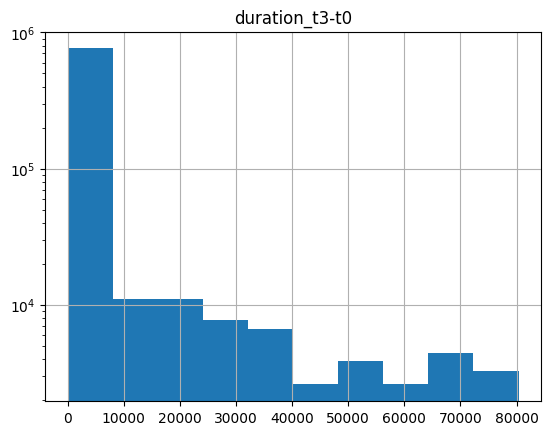

In [ ]:
# calculate duration in minutes from t3 to t0
df['duration_t3-t0'] = (df['t3'] - df['t0']).dt.total_seconds() / 60

# check duration
mask = df['duration_t3-t0']>0
df_mask = df.loc[mask,['file_name','t3','t0','duration_t3-t0']]

df_mask[['duration_t3-t0']].hist(log=True)

In [ ]:
# calculate the date of t0
df['t0_date'] = df['t0'].dt.date
df['t0_date'] = pd.to_datetime(df['t0_date'])

# duplicates

In [ ]:
# check for duplicates
duplicated_missions = df[df.duplicated(subset= ['mission_id'])].mission_id.to_list()
df_duplicates = df[df['mission_id'].isin(duplicated_missions)]
# df_duplicates.to_csv('inv123_duplicates.csv',index=False)


# drop duplicated mission id only for cardiotic arrest
# TODO

# outliers

In [ ]:
# inspect abandon reasons
col = 'abandon_reason'
frequency_count = df[col].value_counts()

#df_refuse = df[df['abandon_reason'] == 'Weigering van vervoer']
#col = ['eventtype']
#frequency_count = df_refuse[col].value_counts()
#frequency_count[:15]


# ============DROP ABANDON REASONS===============
abandon_drop = ['Error',
                'Loos alarm goed bedoeld',
                'Kwaadwillig',
                'Geannuleerde rit'
                'Kwaadwillige oproep',]

df = df[~df['abandon_reason'].isin(abandon_drop)]

In [ ]:
# LON, LAT value check
cols = ['latitude_permanence',
        'longitude_permanence',
        'latitude_intervention',
        'longitude_intervention',]

#df.loc[df.latitude_intervention < 49,cols]
#df.loc[df.longitude_intervention < 2,cols]

# replace 0 with N/A
df['latitude_intervention'] = df['latitude_intervention'].replace(0, np.nan)
df['longitude_intervention'] = df['longitude_intervention'].replace(0, np.nan)

# deal with small value of latitude_intervention
df.loc[df['latitude_intervention'] < 49, 'latitude_intervention'] *= 10

<ipython-input-18-10c50c7980e7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['latitude_intervention'] = df['latitude_intervention'].replace(0, np.nan)
<ipython-input-18-10c50c7980e7>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['longitude_intervention'] = df['longitude_intervention'].replace(0, np.nan)


In [ ]:
# check duration and waiting_time

# round the duration to compare with waiting_time
df['duration_t3-t0_round'] = df['duration_t3-t0'].round()

cols = ['t3','t0','duration_t3-t0','duration_t3-t0_round','waiting_time',]

#df_waiting_check = df.loc[abs(df['duration_t3-t0_round']-df['waiting_time'])>1,cols]
#df_waiting_check.to_csv('df_waiting_check.csv')

# =================CORRECTION STARTS ========================
# replace negative durations with N/A
df.loc[df['duration_t3-t0'] <=0, 'duration_t3-t0'] = np.nan

# replace waiting_time > 24hours with N/A
df.loc[df['waiting_time'] > 24*60, 'waiting_time'] = np.nan
# replace waiting_time = 0 with N/A
df.loc[df['waiting_time'] <= 0, 'waiting_time'] = np.nan

# round the duration to compare with waiting_time
df['duration_t3-t0_round'] = df['duration_t3-t0'].round()

# for cases when duration - waiting_timie = 60, use waiting_time instead of duration
rows_to_update = df[(df['duration_t3-t0_round'] - df['waiting_time'] >= 59) & (abs(df['duration_t3-t0_round']-df['waiting_time'])<=61)].index
df.loc[rows_to_update, 'duration_t3-t0'] -= 60

# round the duration to compare with waiting_time
df['duration_t3-t0_round'] = df['duration_t3-t0'].round()

# check if na values in duration can be filled by waiting_time
#df.loc[df['duration_t3-t0'].isnull() & df['waiting_time'].notnull()].to_csv('df_waiting_time_check_2.csv')

# remove the helper column
df.drop('duration_t3-t0_round',axis=1,inplace=True)

# =================CORRECTION ENDS ========================

<ipython-input-19-416e1c14d42a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration_t3-t0_round'] = df['duration_t3-t0'].round()
<ipython-input-19-416e1c14d42a>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration_t3-t0_round'] = df['duration_t3-t0'].round()


# average waiting time

In [ ]:
# wait time and duration for P03
df_ca = df.copy()
df_ca.dropna(subset=['eventtype'],inplace=True)

In [ ]:
df_ca = df_ca[df_ca['eventtype'].str.startswith('P003')]

In [ ]:
df.waiting_time.median()

12.0

In [ ]:
df_ca.waiting_time.median()

12.0

# duration clean

<Axes: >

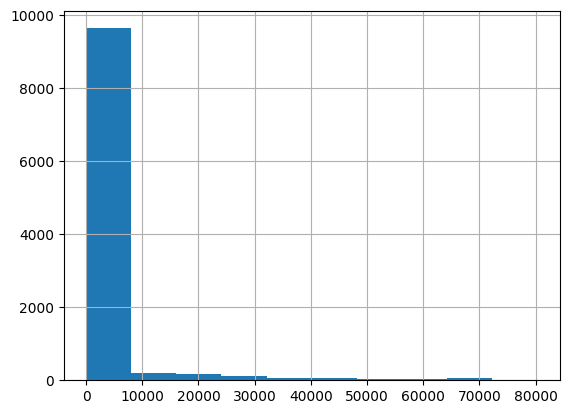

In [ ]:
df_ca['duration_t3-t0'].hist()

<Axes: >

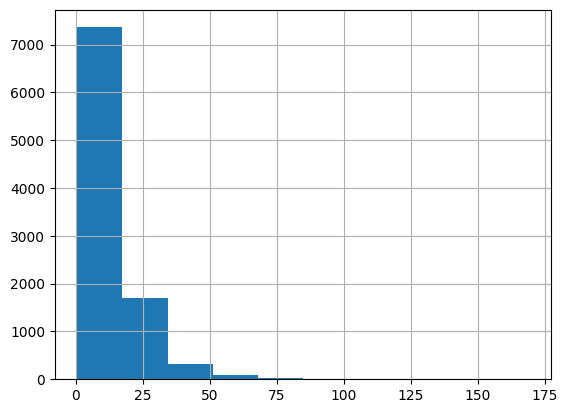

In [ ]:
df_ca.loc[df_ca['duration_t3-t0']<200,'duration_t3-t0'].hist()

In [ ]:
df = df[df['duration_t3-t0']<200].copy()

In [ ]:
#save output
df.to_csv('interventions_processed.csv')